In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
from omama import gp2
from omama.gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(classifier='kunet',
           discriminator='cnn',
           activation='relu',
           use_batch_norm=True,
           upsample_mode='deconv',
           dropout=0.3,
           dropout_change_per_layer=0.0,
           dropout_type='spatial',
           use_dropout_on_upsampling=False,
           use_attention=False,
           filters=16,
           num_layers=4,
           output_activation='sigmoid',
           optimizer=None,
           loss=None,
           metric=None,
           verbose=False
          )

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------
*** GP2 Keras UNet ***
Working directory: /tmp/tmp2one9bdfGP2


In [4]:
# load our dataset  (images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

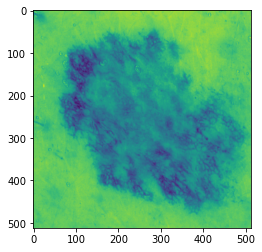

In [5]:
imshow(images[44])

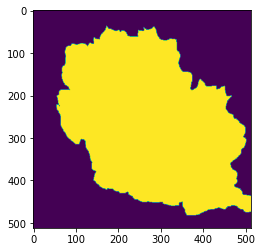

In [6]:
imshow(masks[44])

In [7]:
images.shape

(20030, 512, 512, 1)

In [8]:
masks.shape

(20030, 512, 512, 1)

In [9]:
images = images[:10000]

In [10]:
masks = masks[:10000]

In [11]:
R.run(images=images, masks=masks, runs=10, use_multi_gpu=True)

Number of devices: 3
Weights OK!
******
Loop 1
Epoch 1/100
8/8 [==============================] - 26s 2s/step - loss: 0.7773 - dice_coeff: 0.2589 - val_loss: 0.7401 - val_dice_coeff: 0.2462
Epoch 2/100
8/8 [==============================] - 8s 1s/step - loss: 0.7278 - dice_coeff: 0.2855 - val_loss: 0.6950 - val_dice_coeff: 0.2464
Epoch 3/100
8/8 [==============================] - 8s 1s/step - loss: 0.6922 - dice_coeff: 0.3100 - val_loss: 0.6756 - val_dice_coeff: 0.2449
Epoch 4/100
8/8 [==============================] - 8s 1s/step - loss: 0.6666 - dice_coeff: 0.3224 - val_loss: 0.6598 - val_dice_coeff: 0.2431
Epoch 5/100
8/8 [==============================] - 8s 1s/step - loss: 0.6448 - dice_coeff: 0.3364 - val_loss: 0.6465 - val_dice_coeff: 0.2419
Epoch 6/100
8/8 [==============================] - 8s 1s/step - loss: 0.6402 - dice_coeff: 0.3402 - val_loss: 0.6337 - val_dice_coeff: 0.2410
Epoch 7/100
8/8 [==============================] - 8s 1s/step - loss: 0.6288 - dice_coeff: 0.3460 - 

Epoch 5/100
11/11 [==============================] - 10s 935ms/step - loss: 0.4055 - dice_coeff: 0.4494 - val_loss: 0.4134 - val_dice_coeff: 0.2407
Epoch 6/100
11/11 [==============================] - 10s 930ms/step - loss: 0.3999 - dice_coeff: 0.4514 - val_loss: 0.4139 - val_dice_coeff: 0.2406
Epoch 7/100
11/11 [==============================] - 10s 902ms/step - loss: 0.3947 - dice_coeff: 0.4611 - val_loss: 0.4335 - val_dice_coeff: 0.2082
Epoch 8/100
11/11 [==============================] - 10s 915ms/step - loss: 0.3927 - dice_coeff: 0.4593 - val_loss: 0.4308 - val_dice_coeff: 0.2127
Epoch 9/100
11/11 [==============================] - 10s 914ms/step - loss: 0.3883 - dice_coeff: 0.4676 - val_loss: 0.4065 - val_dice_coeff: 0.2495
Epoch 10/100
11/11 [==============================] - 10s 942ms/step - loss: 0.3924 - dice_coeff: 0.4642 - val_loss: 0.3963 - val_dice_coeff: 0.2677
Epoch 11/100
11/11 [==============================] - 10s 919ms/step - loss: 0.3793 - dice_coeff: 0.4691 - val_

Epoch 1/100
19/19 [==============================] - 18s 967ms/step - loss: 0.2960 - dice_coeff: 0.5417 - val_loss: 0.2797 - val_dice_coeff: 0.5020
Epoch 2/100
19/19 [==============================] - 14s 731ms/step - loss: 0.3025 - dice_coeff: 0.5426 - val_loss: 0.2975 - val_dice_coeff: 0.4496
Epoch 3/100
19/19 [==============================] - 14s 721ms/step - loss: 0.2921 - dice_coeff: 0.5543 - val_loss: 0.2873 - val_dice_coeff: 0.4822
Epoch 4/100
19/19 [==============================] - 14s 755ms/step - loss: 0.2910 - dice_coeff: 0.5612 - val_loss: 0.2920 - val_dice_coeff: 0.4760
Epoch 5/100
19/19 [==============================] - 14s 739ms/step - loss: 0.2888 - dice_coeff: 0.5610 - val_loss: 0.2790 - val_dice_coeff: 0.4971
Epoch 6/100
19/19 [==============================] - 14s 766ms/step - loss: 0.2914 - dice_coeff: 0.5555 - val_loss: 0.2877 - val_dice_coeff: 0.4734
Epoch 7/100
19/19 [==============================] - 14s 757ms/step - loss: 0.2871 - dice_coeff: 0.5498 - val_lo

In [12]:
R.classifier_scores

[[0.5177136063575745, 0.18881702423095703],
 [0.4870345890522003, 0.1837877780199051],
 [0.43028315901756287, 0.26407814025878906],
 [0.38452795147895813, 0.3201620876789093],
 [0.3406182825565338, 0.40541762113571167],
 [0.3304383456707001, 0.432697057723999],
 [0.3160035312175751, 0.44757381081581116],
 [0.28296610713005066, 0.5211716294288635],
 [0.27674850821495056, 0.5233444571495056],
 [0.2620178163051605, 0.556654155254364]]

In [13]:
R.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0]]

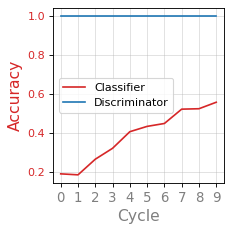

In [14]:
R.plot() 